# Convert IUV to smpl format

densepose outputs uv renders in a format of `*_IUV.png` images. To use them in CBI inference, you need to transform them to SMPL format in `.npy`.

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from utils import smpltex
from utils.demo import iuv2smpluv

In [2]:
# load densepose -> smpl uv transformer
mapping_file = 'data/smpltexmap.npy'
transformer = smpltex.TexTransformer(mapping_file)

In [3]:
iuv_dir = 'data/samples/source_iuv/'
sample_id = 'WOMEN#Blouses_Shirts#id_00000442#01_2_side'

iuv_path = os.path.join(iuv_dir, sample_id+'_IUV.png')

# load densepose iuv image
iuv_png = cv2.imread(iuv_path)[..., ::-1]

# transform to smpl uv
uv_smpl = iuv2smpluv(iuv_png, transformer)

In [4]:
# save smpl uv to .npy file
out_dir = 'data/samples/source_uv/'
out_path = os.path.join(out_dir, sample_id+'.npy')
np.save(out_path, uv_smpl)

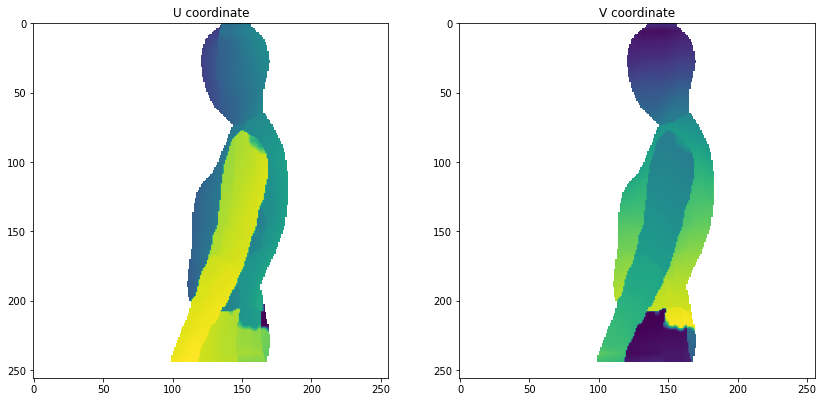

In [5]:
fig, ax = plt.subplots(1,2, figsize=(14,7))
ax[0].imshow(uv_smpl[..., 0])
ax[1].imshow(uv_smpl[..., 1])

ax[0].set_title('U coordinate')
ax[1].set_title('V coordinate');

# Infer sample

In [6]:
from utils.demo import load_data, create_pipeline
from utils.common import tti

import matplotlib.pyplot as plt

In [7]:
# load model
checkpoint_path = 'data/checkpoint'
device = 'cuda:0'

pipeline = create_pipeline(checkpoint_path, device)

In [8]:
# load _data sample
samples_root = 'data/samples'
source_sample = 'WOMEN#Blouses_Shirts#id_00007424#02_7_additional'
target_sample = 'WOMEN#Dresses#id_00000106#03_1_front'

data_dict = load_data(samples_root, source_sample, target_sample, device=device)

In [9]:
# process_sample
output_dict = pipeline(data_dict)

pred_img = tti(output_dict['refined'])

/home/user/miniconda/envs/gent_docker/lib/python3.7/site-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/home/user/miniconda/envs/gent_docker/lib/python3.7/site-packages/torch/nn/functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


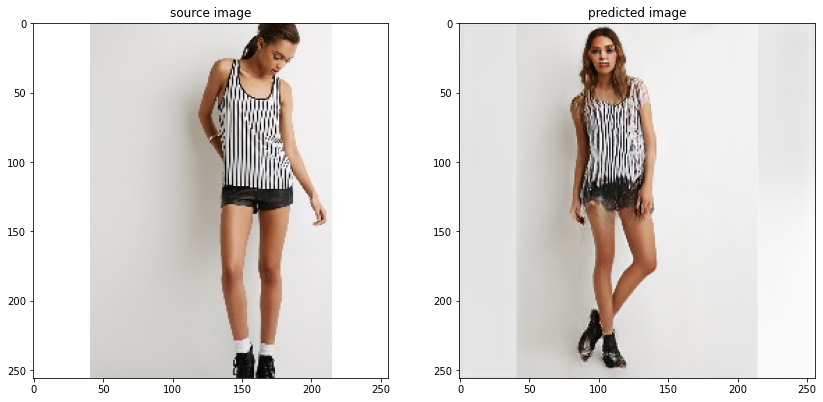

In [10]:
source_rgb = tti(data_dict['source_img'])

fig, ax = plt.subplots(1,2, figsize=(14,7))
ax[0].imshow(source_rgb)
ax[1].imshow(pred_img)

ax[0].set_title('source image')
ax[1].set_title('predicted image');